In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.python.keras.layers import Dense, Flatten
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam

from keras.layers import Input, Lambda, Dense, Flatten
from keras.models import Model
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

from tensorflow.keras.applications import Xception
from tensorflow.keras.applications.xception import Xception
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense


In [ ]:
# for vgg16
from keras.layers import Input, Lambda, Dense, Flatten
from keras.models import Model
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore", category=FutureWarning)


In [ ]:
!pip install tensorflow

In [ ]:
IMAGE_SIZE = [256, 256]

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!ls '/content/drive'


MyDrive


In [ ]:
#Give dataset path
train_path = '/content/drive/MyDrive/split/train'
test_path = '/content/drive/MyDrive/split/test'

Working with 800 images
Image examples: 
Healthy_102.png


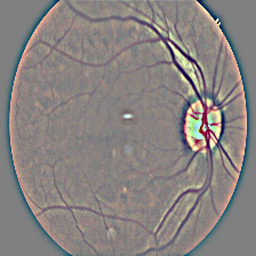

Healthy_105.png


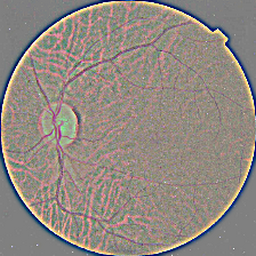

Healthy_100.png


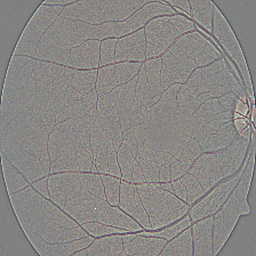

Healthy.png


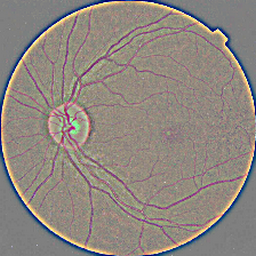

Healthy_107.png


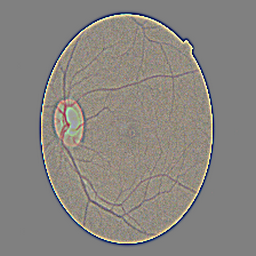

Healthy_10.png


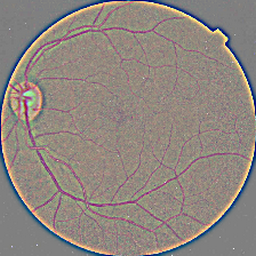

Healthy_103.png


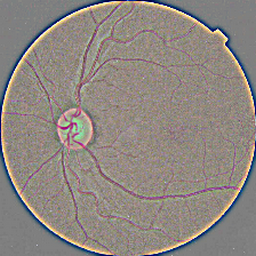

Healthy_106.png


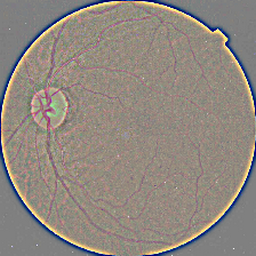

Healthy_101.png


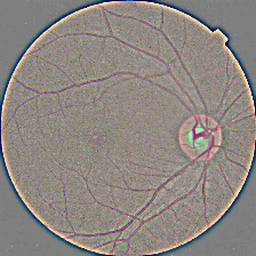

Healthy_104.png


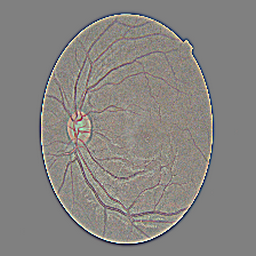

In [ ]:
from PIL import Image
import os
from IPython.display import display
from IPython.display import Image as _Imgdis
# creating a object


folder = train_path+'/Healthy'


onlybenignfiles = [f for f in os.listdir(folder) if os.path.isfile(os.path.join(folder, f))]
print("Working with {0} images".format(len(onlybenignfiles)))
print("Image examples: ")


for i in range(10):
    print(onlybenignfiles[i])
    display(_Imgdis(filename=folder + "/" + onlybenignfiles[i], width=240, height=240))

In [ ]:
# xception = Xception(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)
# xception_output = xception.output

In [ ]:
# for vgg16
vgg = VGG16(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)
vgg.output

58889256/58889256 [==============================] - 0s 0us/step


<KerasTensor: shape=(None, 8, 8, 512) dtype=float32 (created by layer 'block5_pool')>

In [ ]:
# xception.input

In [ ]:
# for vgg16
vgg.input

<KerasTensor: shape=(None, 256, 256, 3) dtype=float32 (created by layer 'input_4')>

In [ ]:
# for layer in xception.layers:
#   layer.trainable = False


In [ ]:
# for vgg 16
for layer in vgg.layers:
  layer.trainable = False

In [ ]:
folders = glob('/content/drive/MyDrive/split/train/*')
print(len(folders))

5


In [ ]:
# from tensorflow.keras.layers import Flatten, Dense
# from tensorflow.keras.models import Model
# from tensorflow.keras.applications import Xception

# # Existing code
# xception = Xception(input_shape=(256, 256, 3), weights='imagenet', include_top=False)

# # Add additional layers
# x = Flatten()(xception.output)
# x = Dense(256, activation='relu')(x)
# x = Dense(128, activation='relu')(x)
# x = Dense(64, activation='relu')(x)
# x = Dense(32, activation='relu')(x)
# prediction = Dense(len(folders), activation='softmax')(x)

# # Create the model
# model = Model(inputs=xception.input, outputs=prediction)
# model.summary()


In [ ]:
# for vgg16
from keras.layers import Flatten, Dense
from keras.models import Model

# Existing code
vgg = VGG16(input_shape=(224, 224, 3), weights='imagenet', include_top=False)

# Add additional layers
x = Flatten()(vgg.output)
x = Dense(256, activation='relu')(x)
x = Dense(128, activation='relu')(x)
x = Dense(64, activation='relu')(x)
x = Dense(32, activation='relu')(x)
prediction = Dense(len(folders), activation='softmax')(x)

# Create the model
model = Model(inputs=vgg.input, outputs=prediction)
model.summary()


Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0   

In [ ]:
# from tensorflow.keras import optimizers

# adam = optimizers.Adam(learning_rate=0.001)
# model.compile(loss='binary_crossentropy',
#               optimizer=adam,
#               metrics=['accuracy'])


In [ ]:
# for vgg16
from keras import optimizers


adam = optimizers.Adam(learning_rate=0.001)
model.compile(loss='binary_crossentropy',
              optimizer=adam,
              metrics=['accuracy'])

In [ ]:
train_datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

In [ ]:

test_datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')


In [ ]:
train_set = train_datagen.flow_from_directory(train_path,
                                             target_size=(256, 256),
                                             batch_size=16,
                                             class_mode='categorical')


Found 2200 images belonging to 5 classes.


In [ ]:
test_set = test_datagen.flow_from_directory(test_path,
                                            target_size = (256, 256),
                                            batch_size = 4,
                                            class_mode = 'categorical')

Found 550 images belonging to 5 classes.


In [ ]:
class_names = list(train_set.class_indices.keys())
print(class_names)

['Healthy', 'Mild DR', 'Moderate DR', 'Proliferate DR', 'Severe DR']


In [ ]:
# from datetime import datetime
# from tensorflow.keras.callbacks import ModelCheckpoint
# from tensorflow.keras.layers import GlobalAveragePooling2D, Dense
# from tensorflow.keras.models import Model
# from tensorflow.keras.optimizers import Adam
# from tensorflow.keras.applications.xception import Xception
# from tensorflow.keras.layers import GlobalAveragePooling2D, Dense


# # Add additional layers to the model
# x = GlobalAveragePooling2D()(xception.output)
# x = Dense(256, activation='relu')(x)
# x = Dense(128, activation='relu')(x)
# x = Dense(64, activation='relu')(x)  # Additional hidden layer
# x = Dense(32, activation='relu')(x)  # Additional hidden layer
# #predictions = Dense(len('5'), activation='softmax')(x)
# predictions = Dense(5, activation='softmax')(x)

# # Create the model
# model = Model(inputs=xception.input, outputs=predictions)

# # Compile the model
# optimizer = Adam(learning_rate=0.001)
# model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

# # Set up checkpoints
# checkpoint = ModelCheckpoint(filepath='mymodel.h5', verbose=1, save_best_only=True)
# callbacks = [checkpoint]

# start = datetime.now()

# # Train the model
# model_history = model.fit(
#     train_set,
#     validation_data=test_set,
#     epochs=10,
#     steps_per_epoch=len(train_set),
#     validation_steps=len(test_set),
#     callbacks=callbacks,
#     verbose=2
# )

# duration = datetime.now() - start
# print("Training completed in time: ", duration)


Epoch 1/10

Epoch 1: val_loss improved from inf to 1.45695, saving model to mymodel.h5
138/138 - 121s - loss: 1.1368 - accuracy: 0.5936 - val_loss: 1.4570 - val_accuracy: 0.6055 - 121s/epoch - 878ms/step
Epoch 2/10

Epoch 2: val_loss improved from 1.45695 to 1.12638, saving model to mymodel.h5
138/138 - 73s - loss: 0.9526 - accuracy: 0.6536 - val_loss: 1.1264 - val_accuracy: 0.6345 - 73s/epoch - 529ms/step
Epoch 3/10

Epoch 3: val_loss did not improve from 1.12638
138/138 - 71s - loss: 0.9073 - accuracy: 0.6550 - val_loss: 1.8723 - val_accuracy: 0.6036 - 71s/epoch - 517ms/step
Epoch 4/10

Epoch 4: val_loss did not improve from 1.12638
138/138 - 73s - loss: 0.8652 - accuracy: 0.6809 - val_loss: 1.8454 - val_accuracy: 0.5291 - 73s/epoch - 530ms/step
Epoch 5/10

Epoch 5: val_loss did not improve from 1.12638
138/138 - 72s - loss: 0.8423 - accuracy: 0.6800 - val_loss: 1.5449 - val_accuracy: 0.5382 - 72s/epoch - 523ms/step
Epoch 6/10

Epoch 6: val_loss improved from 1.12638 to 0.97639, savi

In [ ]:
# for vgg16
from datetime import datetime
from keras.callbacks import ModelCheckpoint
from keras.layers import GlobalAveragePooling2D, Dense
from keras.models import Model
from keras.optimizers import Adam

# Add additional layers to the model
x = GlobalAveragePooling2D()(vgg.output)
x = Dense(256, activation='relu')(x)
x = Dense(128, activation='relu')(x)
x = Dense(64, activation='relu')(x)
x = Dense(32, activation='relu')(x)
predictions = Dense(len(folders), activation='softmax')(x)

# Create the model
model = Model(inputs=vgg.input, outputs=predictions)

# Compile the model
optimizer = Adam(lr=0.001)
model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

# Set up checkpoints
checkpoint = ModelCheckpoint(filepath='mymodel.h5', verbose=1, save_best_only=True)
callbacks = [checkpoint]

start = datetime.now()

# Train the model
model_history = model.fit(
    train_set,
    validation_data=test_set,
    epochs=10,
    steps_per_epoch=len(train_set),
    validation_steps=len(test_set),
    callbacks=callbacks,
    verbose=2
)

duration = datetime.now() - start
print("Training completed in time: ", duration)

Epoch 1/10

Epoch 1: val_loss improved from inf to 1.26295, saving model to mymodel.h5
138/138 - 80s - loss: 1.7931 - accuracy: 0.4718 - val_loss: 1.2630 - val_accuracy: 0.5255 - 80s/epoch - 580ms/step
Epoch 2/10

Epoch 2: val_loss improved from 1.26295 to 1.10618, saving model to mymodel.h5
138/138 - 68s - loss: 1.2090 - accuracy: 0.5523 - val_loss: 1.1062 - val_accuracy: 0.5982 - 68s/epoch - 490ms/step
Epoch 3/10

Epoch 3: val_loss did not improve from 1.10618
138/138 - 65s - loss: 1.2103 - accuracy: 0.5536 - val_loss: 1.1311 - val_accuracy: 0.6018 - 65s/epoch - 472ms/step
Epoch 4/10

Epoch 4: val_loss improved from 1.10618 to 1.08190, saving model to mymodel.h5
138/138 - 66s - loss: 1.1133 - accuracy: 0.5936 - val_loss: 1.0819 - val_accuracy: 0.5909 - 66s/epoch - 478ms/step
Epoch 5/10

Epoch 5: val_loss did not improve from 1.08190
138/138 - 66s - loss: 1.0520 - accuracy: 0.6150 - val_loss: 1.1737 - val_accuracy: 0.5855 - 66s/epoch - 479ms/step
Epoch 6/10

Epoch 6: val_loss did not 

In [ ]:
# Load the saved model
trained_model = keras.models.load_model('mymodel.h5')

# Load and preprocess the new image
# Replace 'path_to_new_image.jpg' with the path to the new image you want to predict
new_image = keras.preprocessing.image.load_img('path_to_new_image.jpg', target_size=img_size)
new_image = keras.preprocessing.image.img_to_array(new_image)
new_image = np.expand_dims(new_image, axis=0)

# Perform prediction
prediction = trained_model.predict(new_image)

# Get the class label with the highest probability
predicted_class = np.argmax(prediction[0])

# If you have a list of class labels, you can get the predicted class name
class_labels = [...]  # List of class labels in the same order as the model's output
predicted_class_name = class_labels[predicted_class]

print("Predicted class:", predicted_class_name)

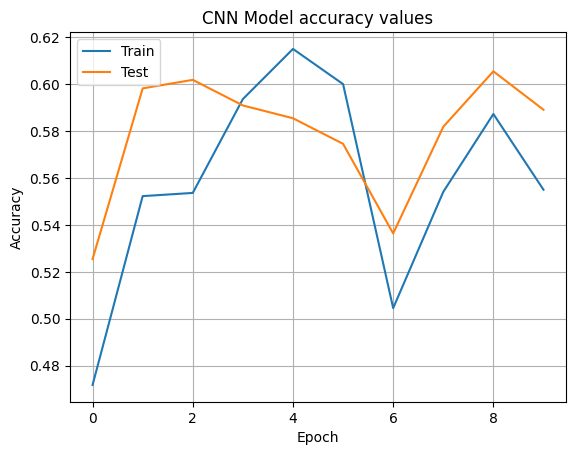

In [ ]:
# Plot training & validation loss values
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.grid()
plt.title('CNN Model accuracy values')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.savefig('accuracy_plot_vgg16.png')
plt.show()

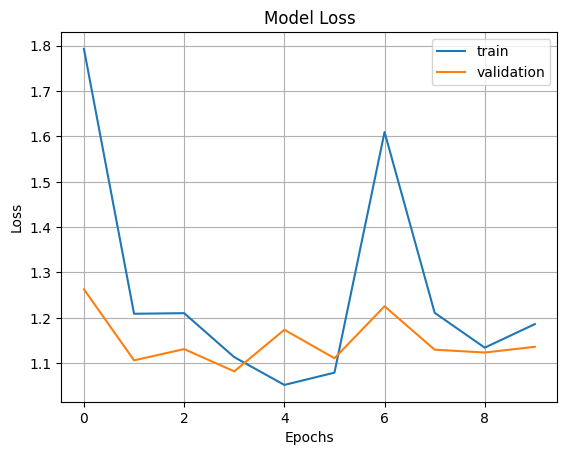

In [ ]:
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.grid()
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train', 'validation'])
plt.savefig('modelloss_plot_vgg16.png')
plt.show()

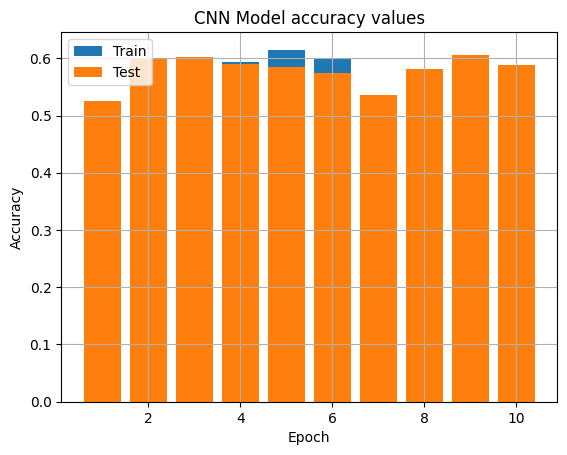

In [ ]:
import matplotlib.pyplot as plt

# Get the accuracy values from the model history
train_accuracy = model_history.history['accuracy']
val_accuracy = model_history.history['val_accuracy']

# Get the number of epochs
epochs = range(1, len(train_accuracy) + 1)

# Plot the bar graph
plt.bar(epochs, train_accuracy)
plt.bar(epochs, val_accuracy)
plt.grid()
plt.title('CNN Model accuracy values')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.savefig('accuracy_plot_inbargraph_vgg16.png')
plt.show()
plt.show()


In [ ]:
plt.plot(model_history.history['recall'])
plt.plot(model_history.history['val_recall'])
plt.grid()
plt.title('CNN Model Recall')
plt.ylabel('Recall')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()


In [ ]:
plt.plot(model_history.history['f1_score'])
plt.plot(model_history.history['val_f1_score'])
plt.grid()
plt.title('CNN Model F1-Score')
plt.ylabel('F1-Score')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()
